In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

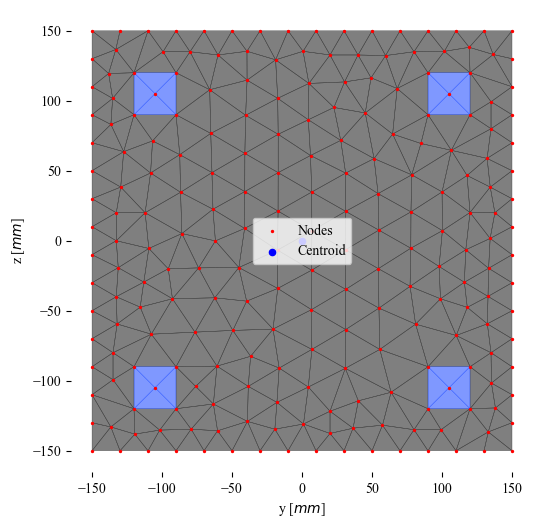

╒════════════════════╤══════════╕
│ Mesh Type          │ triangle │
├────────────────────┼──────────┤
│ Number of elements │ 382      │
├────────────────────┼──────────┤
│ Number of nodes    │ 222      │
├────────────────────┼──────────┤
│ Cross Section Area │ 90000.00 │
╘════════════════════╧══════════╛
╒═══════════════════╤══════════════╤══════════════╕
│                   │            y │            z │
╞═══════════════════╪══════════════╪══════════════╡
│ Centroid          │        -0.00 │        -0.00 │
├───────────────────┼──────────────┼──────────────┤
│ Moment of inertia │ 675000000.00 │ 675000000.00 │
╘═══════════════════╧══════════════╧══════════════╛


In [2]:
ReinforcedConcrete = Simple_RC_Column(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 30)
mesh = Mesh(ReinforcedConcrete, "triangle", 20)
mesh.plot()
mesh.print()

In [3]:
struc_10 = structure.Cantilever(beam        = mesh, 
								length      = 2000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 10)

In [4]:
non_linear_solver_10 = solver.Nonlinear(struc_10, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8,
									    section_max_iter = 500)

In [5]:
increments = np.zeros(200)
increments.fill(0.5)

from contextlib import redirect_stdout
with open(os.devnull, 'w') as f, redirect_stdout(f):
	u_history_10, lambda_history_10 = non_linear_solver_10.solve(increments)

  0%|          | 0/200 [00:00<?, ?it/s]

In [6]:
import csv 

lambdaArray = []
dispArray = []
with open('opensees_RC.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        lambdaArray.append(float(row[0]))
        dispArray.append(float(row[1]))

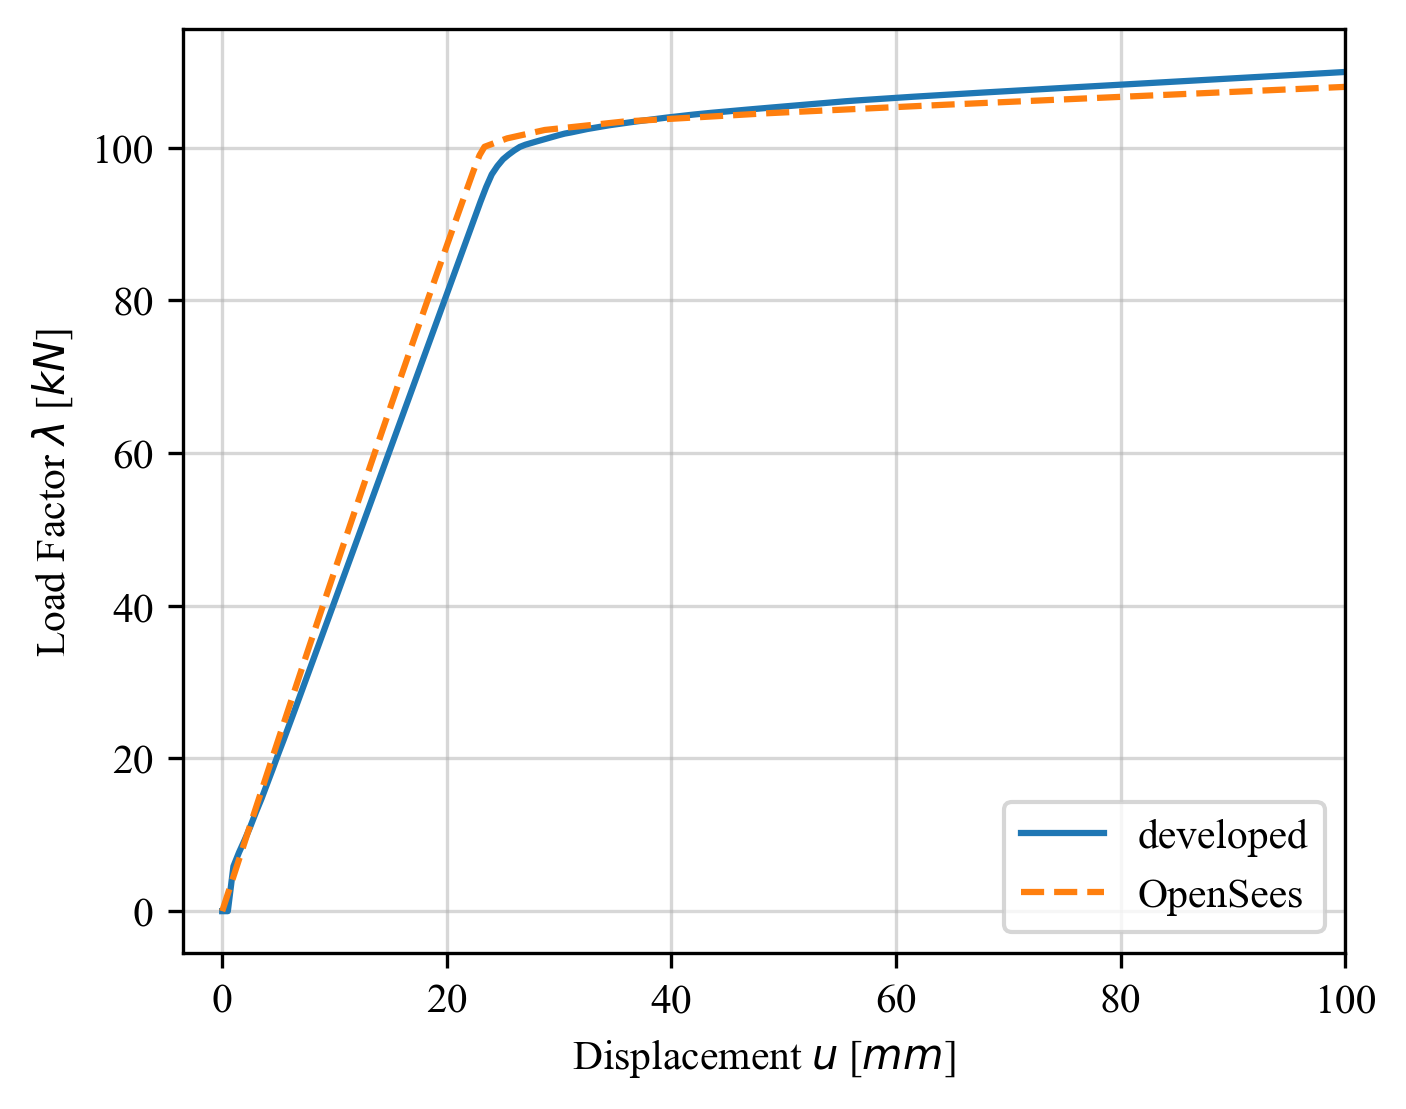

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(5, 4))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300

ls=["dashdot", (0, (3, 5, 1, 5, 1, 5)),"dashed", "dotted","-"]

ax.plot(u_history_10[:,6+2], lambda_history_10/1000,   label="developed", ls="-")
ax.plot(dispArray, lambdaArray,   label="OpenSees", ls="--")
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="lower right")
ax.set_xlim(-3.5, 100)
ax.grid(alpha=0.5)

plt.show()